In [1]:
%load_ext autoreload
%cd ../
# automatically reload modules when they have changed
from src.metric_utils import plot_instance_confusion_matrix


c:\Users\nguye\Box\DCL_ARCHIVE\Documents\Tan\Research\extended-event-modeling


In [2]:
tag = 'jan_01_uncertainty3E-03_s1030_1E+00_1E-02'

compute_schema_df_tag:259 - src.utils - INFO: Load cached schema_df for tag jan_01_uncertainty3E-03_s1030_1E+00_1E-02!


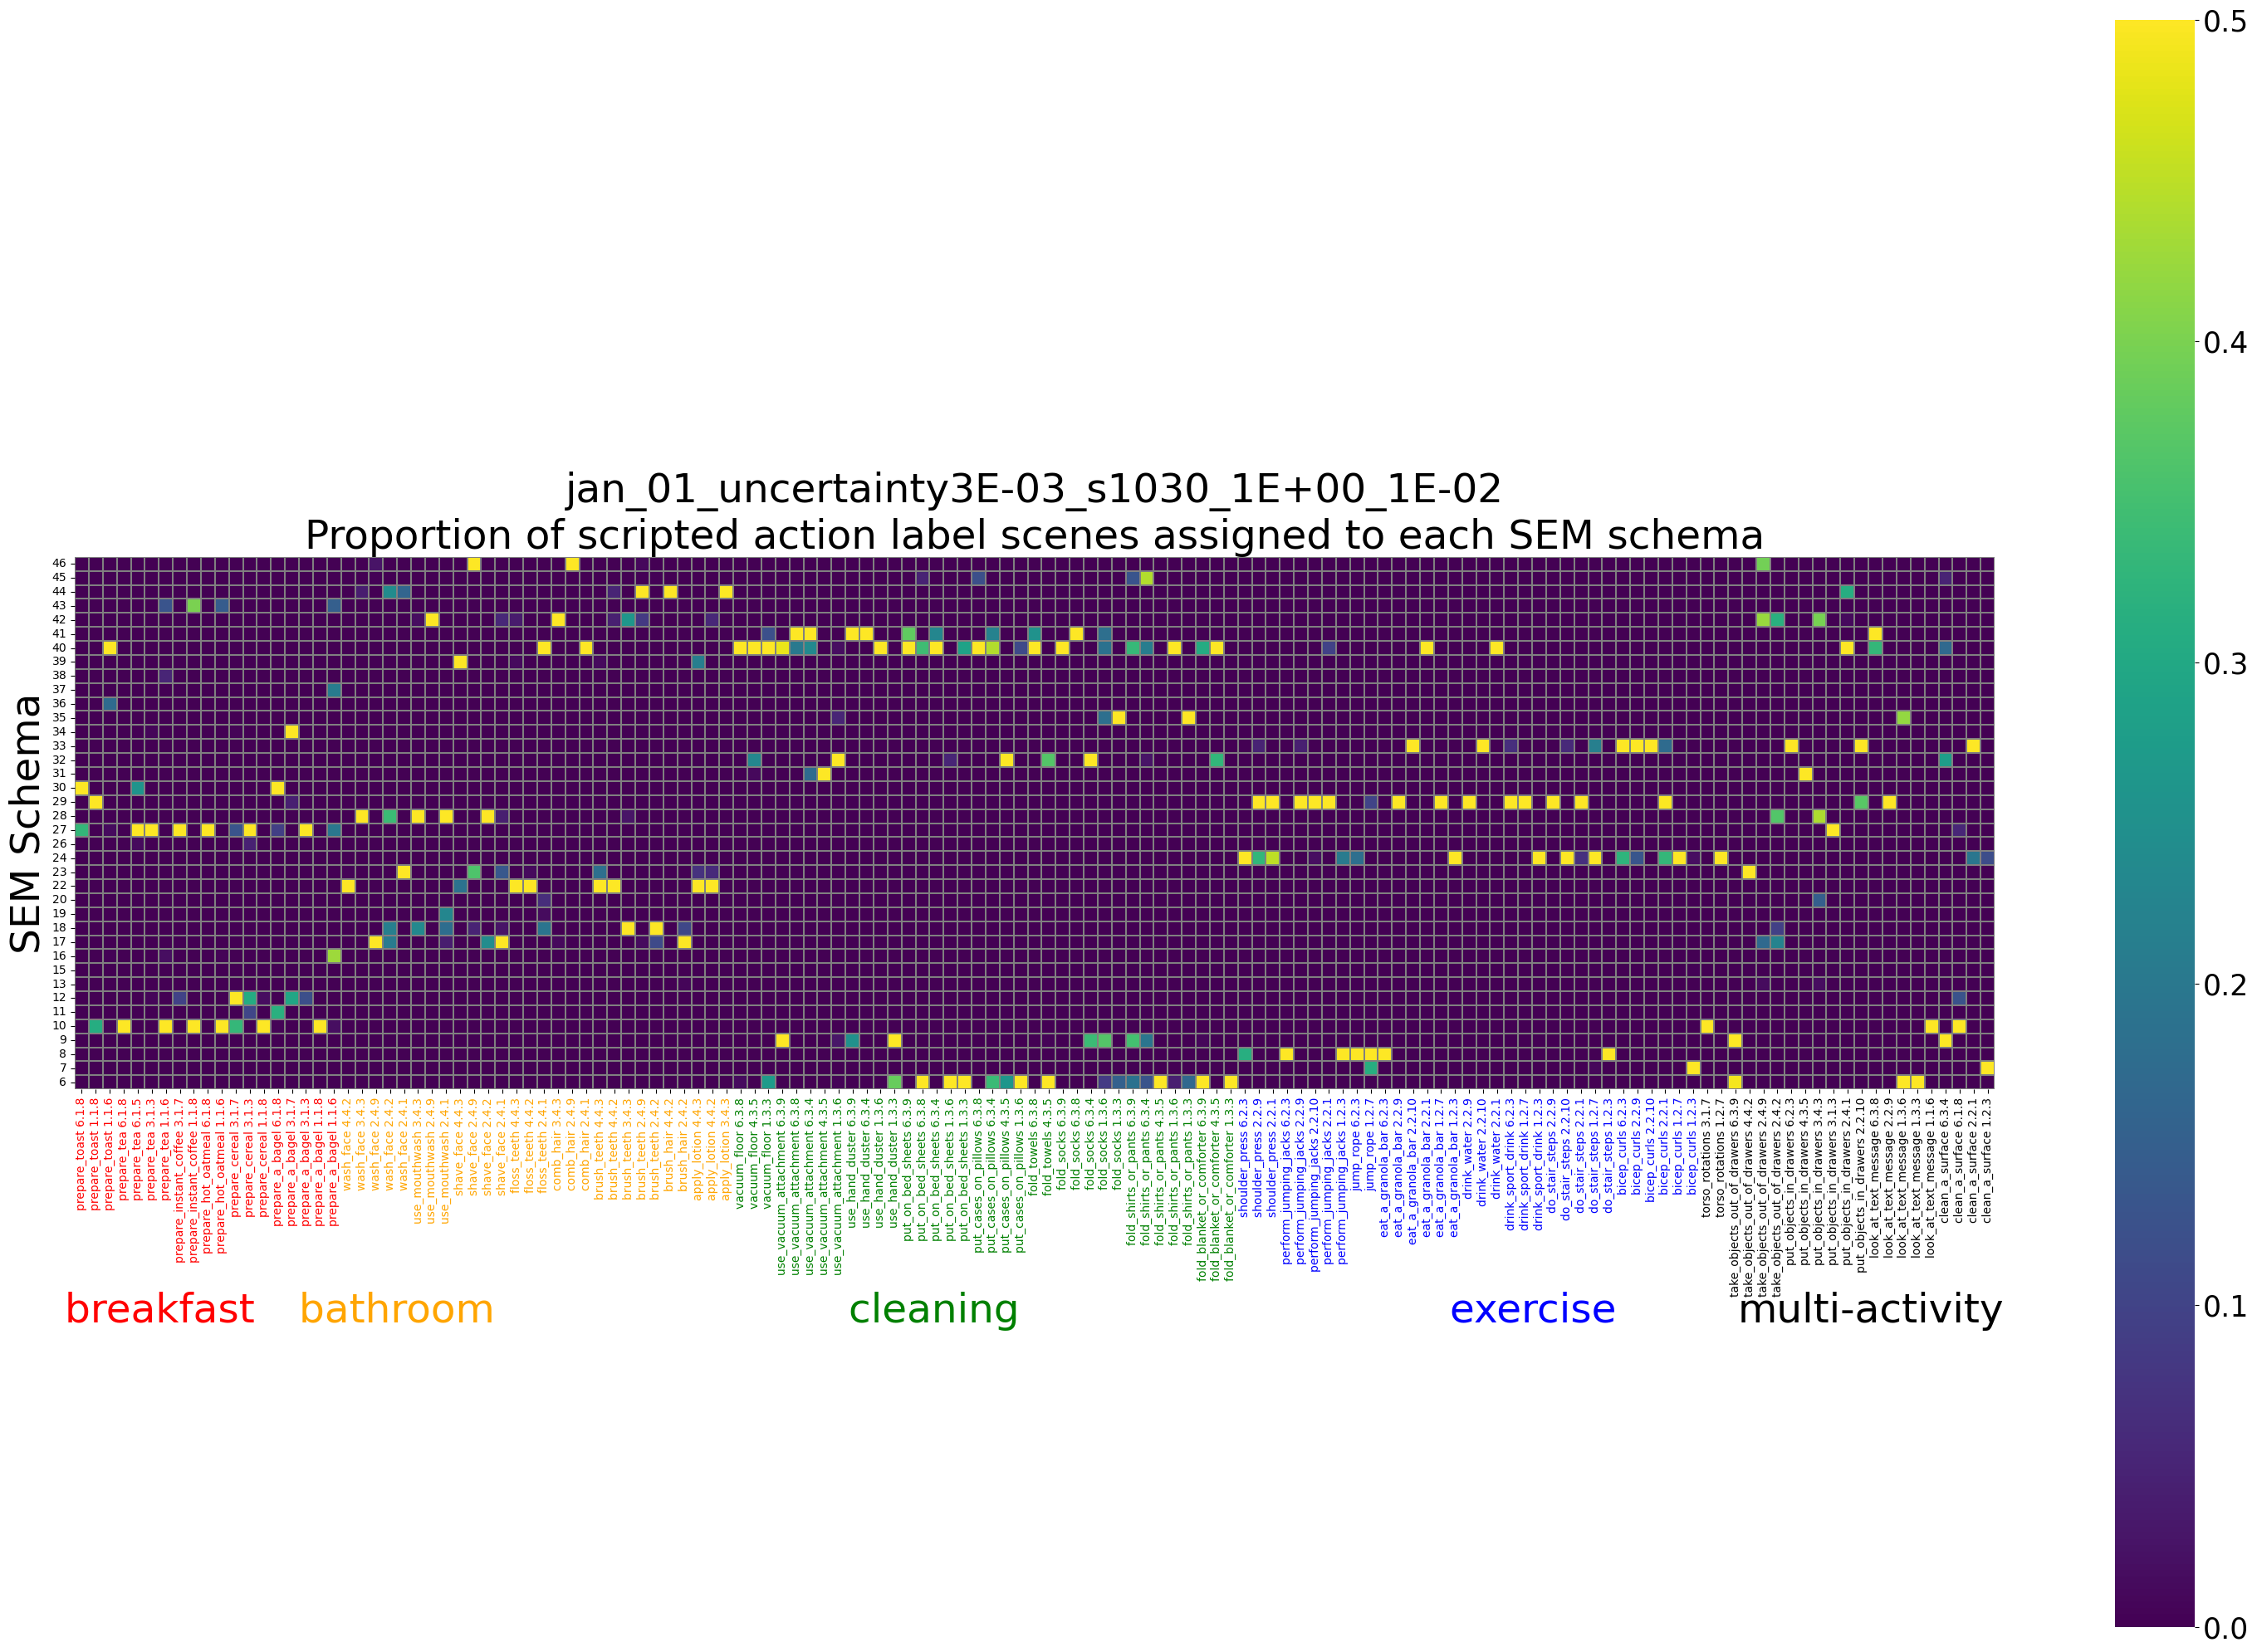

In [3]:
plot_instance_confusion_matrix(epoch=101, tag=tag, schemas='active')

In [ ]:
def plot_confusion_matrix_figure(epoch,schemas='all'):
    # epoch : string
    # schemas : 'all' includes blank rows for all schemas, 'active' is just schemas active in selected epoch
    f, ax = plt.subplots(figsize=(10,15))
    tdf=schemadf[(schemadf['run'].isin(valid_runs)) & (schemadf['epoch']==epoch) & (schemadf['ev'] != 'none')]
    evdict={}
    for evfac in tdf.ev_fact.unique():
        evdict[evfac]=tdf[tdf.ev_fact==evfac]['ev'].iloc[0]
    # compute cross-tabs of SEM events and ground-truth annotations:
    ct=pd.crosstab(tdf.e_hat,tdf.ev)

    # compute linear sum assignment to sort ground-truth labels maximizing match to SEM events:
    # Duplicate SEM rows to match number of ground truth labels if there are fewer SEM events than labels:
    if np.shape(ct)[1] > np.shape(ct)[0]:
        fac=int(np.ceil(np.shape(ct)[1]/np.shape(ct)[0]))   
        padded=pd.concat([ct]*fac)
        padded=padded.sort_index()
        row_ind,col_ind=linear_sum_assignment(padded*-1)
    else:
        row_ind,col_ind=linear_sum_assignment(ct*-1)
    if schemas=='all':
        for ehat in range(schemadf.e_hat.max()+1):
            if ehat not in ct.index:
                df1 = pd.DataFrame([[np.nan] * len(ct.columns)], columns=ct.columns,index=[ehat])
                ct = ct.append(df1)
    elif schemas=='active':
        pass       
    ct=ct.sort_index()
    ct = ct/ct.sum()
    
    # Add percent purity of schemas to index:
    #schema_purity = zip(ct.index,round(ct.max(axis=1)/ct.sum(axis=1),2))
    #ct.index=[str(x[0]) + ' - ' + str(x[1]) for x in schema_purity]
    #label_coverage = zip(ct.columns,round(ct.max(axis=0)/ct.sum(axis=0),2))
    #ct.columns=[str(x[0]) + ' - ' + str(x[1]) for x in label_coverage]        
    if len(ct.columns)==len(col_ind):
        plt.cla()
        # sort columns based on column index:
        # ctplot=ct.iloc[:,col_ind]
        # alphabetize columns:
        # ctplot=ct[sorted(ct.columns)]
        # sort by chapter type:
        ctplot = ct[ct.columns[np.argsort([colors[x] for x in ct.columns])[::-1]]]
        #ctplot=ct[ct.columns[np.argsort(ct.columns.str.split('.').str[-3])]]
        #sns.heatmap(ctplot,annot=False,cbar=True,cmap='viridis',vmin=0,vmax=150,norm=LogNorm(),square=True,linewidths=0.1,linecolor='gray')
        sns.heatmap(ctplot,annot=False,cbar=True,cmap='viridis',vmin=0,vmax=0.5,square=True,linewidths=0.1,linecolor='gray')
        #sns.heatmap(ctplot, mask=ctplot != 0, cbar=False, color = "#440154FF")
        ax.invert_yaxis()
        for tick in ax.get_xticklabels(): 
            tick.set_color(colors[tick._text.rstrip(' -.0123456789')])

        plt.ylabel('SEM Schema')
        plt.xlabel('')
        plt.title('Proportion of scripted action label timepoints assigned to each SEM schema')
        plt.savefig(f'confusion_matrix_figure_{tag}.png')
        #plt.title(f'Epoch {epoch} - {tag}')
        #plt.savefig(f'Epoch {epoch} - {tag}_figure.png')
        plt.tight_layout()


In [ ]:
def plot_confusion_matrix(epoch, schemas='all'):
    # epoch : string
    # schemas : 'all' includes blank rows for all schemas, 'active' is just schemas active in selected epoch
    f, ax = plt.subplots(figsize=(20,5))
    tdf=schemadf[(schemadf['run'].isin(valid_runs)) & (schemadf['epoch']==epoch) & (schemadf['ev'] != 'none')]
    evdict={}
    for evfac in tdf.ev_fact.unique():
        evdict[evfac]=tdf[tdf.ev_fact==evfac]['ev'].iloc[0]
    # compute cross-tabs of SEM events and ground-truth annotations:
    ct=pd.crosstab(tdf.e_hat,tdf.ev)
    
    # compute linear sum assignment to sort ground-truth labels maximizing match to SEM events:
    # Duplicate SEM rows to match number of ground truth labels if there are fewer SEM events than labels:
    if np.shape(ct)[1] > np.shape(ct)[0]:
        fac=int(np.ceil(np.shape(ct)[1]/np.shape(ct)[0]))   
        padded=pd.concat([ct]*fac)
        padded=padded.sort_index()
        row_ind,col_ind=linear_sum_assignment(padded*-1)
    else:
        row_ind,col_ind=linear_sum_assignment(ct*-1)
    if schemas=='all':
        for ehat in range(schemadf.e_hat.max()+1):
            if ehat not in ct.index:
                df1 = pd.DataFrame([[np.nan] * len(ct.columns)], columns=ct.columns,index=[ehat])
                ct = ct.append(df1)
    elif schemas=='active':
        pass       
    ct=ct.sort_index()
    # Add percent purity of schemas to index:
    schema_purity = zip(ct.index,round(ct.max(axis=1)/ct.sum(axis=1),2))
    ct.index=[str(x[0])+'\n'+str(x[1]) for x in schema_purity]
    label_coverage = zip(ct.columns,round(ct.max(axis=0)/ct.sum(axis=0),2))
    ct.columns=[str(x[0])+' '+str(x[1]) for x in label_coverage]        
    if len(ct.columns)==len(col_ind):
        plt.cla()
        # sort columns based on column index:
        ctplot=ct.iloc[:,col_ind]
        
        #sns.heatmap(ctplot,annot=False,cbar=False,cmap='viridis')
        sns.heatmap(ctplot,annot=False,cbar=True,cmap='viridis',vmin=0.000,vmax=150,norm=LogNorm())
        #sns.heatmap(ctplot, mask=ctplot != 0, cbar=False)
        ax.invert_yaxis()
        for tick in ax.get_xticklabels(): 
            tick.set_color(colors[tick._text.rstrip('.0123456789')[:-1]])
        
        plt.ylabel('SEM Schema')
        plt.xlabel('')
        plt.title(f'Epoch {epoch} - {tag}')

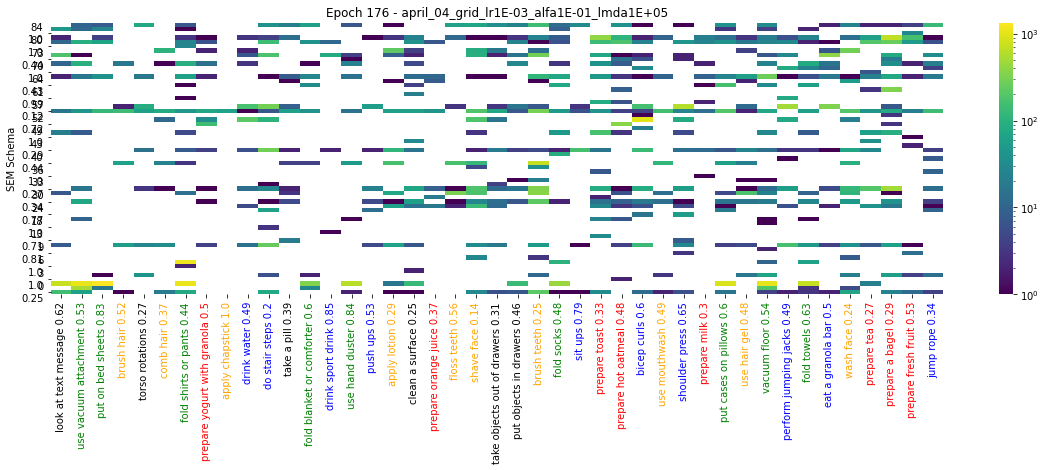

In [232]:
plot_confusion_matrix('176',schemas='active')

In [60]:
def animate_confusion_matrix(schemas='all',col_order='last'):
    
    # epoch : string
    # schemas : 'all' includes blank rows for all schemas, 'active' is just schemas active in selected epoch
    # col_order : string, 'last' fixes columns to final order
    if col_order=='last':
        epoch=epochs[-2]
        #f, ax = plt.subplots(figsize=(20,5))
        tdf=schemadf[(schemadf['run'].isin(valid_runs)) & (schemadf['epoch']==epoch) & (schemadf['ev'] != 'none')]
        evdict={}
        for evfac in tdf.ev_fact.unique():
            evdict[evfac]=tdf[tdf.ev_fact==evfac]['ev'].iloc[0]
        # compute cross-tabs of SEM events and ground-truth annotations:
        ct=pd.crosstab(tdf.e_hat,tdf.ev)
        
        # compute linear sum assignment to sort ground-truth labels maximizing match to SEM events:
        # Duplicate SEM rows to match number of ground truth labels if there are fewer SEM events than labels:
        if np.shape(ct)[1] > np.shape(ct)[0]:
            fac=int(np.ceil(np.shape(ct)[1]/np.shape(ct)[0]))   
            padded=pd.concat([ct]*fac)
            padded=padded.sort_index()
            row_ind,fixed_col_ind=linear_sum_assignment(padded*-1)
        else:
            row_ind,fixed_col_ind=linear_sum_assignment(ct*-1)
    
    # Set up the figure, the axis, and the plot element we want to animate
    f, ax = plt.subplots(figsize=(20,14))

    # animation function.  This is called sequentially
    def animate(i):      
        epoch=epochs[i]
        f, ax = plt.subplots(figsize=(20,5))
        tdf=schemadf[(schemadf['run'].isin(valid_runs)) & (schemadf['epoch']==epoch) & (schemadf['ev'] != 'none')]
        evdict={}
        for evfac in tdf.ev_fact.unique():
            evdict[evfac]=tdf[tdf.ev_fact==evfac]['ev'].iloc[0]
        # compute cross-tabs of SEM events and ground-truth annotations:
        ct=pd.crosstab(tdf.e_hat,tdf.ev)
        if col_order=='last':
            col_ind=fixed_col_ind
        else:
            # compute linear sum assignment to sort ground-truth labels maximizing match to SEM events:
            # Duplicate SEM rows to match number of ground truth labels if there are fewer SEM events than labels:
            if np.shape(ct)[1] > np.shape(ct)[0]:
                fac=int(np.ceil(np.shape(ct)[1]/np.shape(ct)[0]))   
                padded=pd.concat([ct]*fac)
                padded=padded.sort_index()
                row_ind,col_ind=linear_sum_assignment(padded*-1)
            else:
                row_ind,col_ind=linear_sum_assignment(ct*-1)
        
        if schemas=='all':
            for ehat in range(schemadf.e_hat.max()+1):
                if ehat not in ct.index:
                    df1 = pd.DataFrame([[np.nan] * len(ct.columns)], columns=ct.columns,index=[ehat])
                    ct = ct.append(df1)
        elif schemas=='active':
            pass       
        ct=ct.sort_index()
        # Add percent purity of schemas to index:
        schema_purity = zip(ct.index,round(ct.max(axis=1)/ct.sum(axis=1),2))
        ct.index=[str(x[0])+' '+str(x[1]) for x in schema_purity]
        label_coverage = zip(ct.columns,round(ct.max(axis=0)/ct.sum(axis=0),2))
        ct.columns=[str(x[0])+' '+str(x[1]) for x in label_coverage]        
        if len(ct.columns)==len(col_ind):
            plt.cla()
            # sort columns based on column index:
            ctplot=ct.iloc[:,col_ind]
            
            sns.heatmap(ctplot,annot=False,cbar=False,cmap='viridis')
            ax.invert_yaxis()
            for tick in ax.get_xticklabels(): 
                tick.set_color(colors[tick._text.rstrip('.0123456789')[:-1]])
            
            plt.ylabel('SEM Schema')
            plt.xlabel('')
            plt.title(f'Epoch {epoch} - {tag}')
            
        return f

    anim = animation.FuncAnimation(f, animate, 
                                   frames=len(epochs)-1, interval=1, blit=False)
    
    anim.save(f'confusion_matrix_animation_{tag}.mp4', fps=2, extra_args=['-vcodec', 'libx264'])
    
    plt.show()

In [64]:
def animate_instance_confusion_matrix(schemas='all',col_order='last'):
    
    # schemas : 'all' includes blank rows for all schemas, 'active' is just schemas active in selected epoch
    # col_order : string, 'last' fixes columns to final order
    sdf=schemadf[schemadf['run'].isin(valid_runs)]
    epochs=sorted(sdf.epoch.unique(),key=int)
    if col_order=='last':
        epoch=epochs[-2]
        #f, ax = plt.subplots(figsize=(20,5))
        tdf=schemadf[(schemadf['run'].isin(valid_runs)) & (schemadf['epoch']==epoch) & (schemadf['ev_instance'] != 'none')]
        evdict={}
        for evfac in tdf.ev_fact_instance.unique():
            evdict[evfac]=tdf[tdf.ev_fact_instance==evfac]['ev_instance'].iloc[0]
        # compute cross-tabs of SEM events and ground-truth annotations:
        ct=pd.crosstab(tdf.e_hat,tdf.ev_instance)
        
        # compute linear sum assignment to sort ground-truth labels maximizing match to SEM events:
        # Duplicate SEM rows to match number of ground truth labels if there are fewer SEM events than labels:
        if np.shape(ct)[1] > np.shape(ct)[0]:
            fac=int(np.ceil(np.shape(ct)[1]/np.shape(ct)[0]))   
            padded=pd.concat([ct]*fac)
            padded=padded.sort_index()
            row_ind,fixed_col_ind=linear_sum_assignment(padded*-1)
        else:
            row_ind,fixed_col_ind=linear_sum_assignment(ct*-1)
    
    # Set up the figure, the axis, and the plot element we want to animate
    f, ax = plt.subplots(figsize=(20,14))

    # animation function.  This is called sequentially
    def animate(i):      
        epoch=epochs[i]
        f, ax = plt.subplots(figsize=(20,5))
        tdf=schemadf[(schemadf['run'].isin(valid_runs)) & (schemadf['epoch']==epoch) & (schemadf['ev_instance'] != 'none')]
        evdict={}
        for evfac in tdf.ev_fact_instance.unique():
            evdict[evfac]=tdf[tdf.ev_fact_instance==evfac]['ev_instance'].iloc[0]
        # compute cross-tabs of SEM events and ground-truth annotations:
        ct=pd.crosstab(tdf.e_hat,tdf.ev_instance)
        if col_order=='last':
            col_ind=fixed_col_ind
        else:
            # compute linear sum assignment to sort ground-truth labels maximizing match to SEM events:
            # Duplicate SEM rows to match number of ground truth labels if there are fewer SEM events than labels:
            if np.shape(ct)[1] > np.shape(ct)[0]:
                fac=int(np.ceil(np.shape(ct)[1]/np.shape(ct)[0]))   
                padded=pd.concat([ct]*fac)
                padded=padded.sort_index()
                row_ind,col_ind=linear_sum_assignment(padded*-1)
            else:
                row_ind,col_ind=linear_sum_assignment(ct*-1)
        
        if schemas=='all':
            for ehat in range(schemadf.e_hat.max()+1):
                if ehat not in ct.index:
                    df1 = pd.DataFrame([[np.nan] * len(ct.columns)], columns=ct.columns,index=[ehat])
                    ct = ct.append(df1)
        elif schemas=='active':
            pass       
        ct=ct.sort_index()
        # Add percent purity of schemas to index:
        schema_purity = zip(ct.index,round(ct.max(axis=1)/ct.sum(axis=1),2))
        ct.index=[str(x[0])+' '+str(x[1]) for x in schema_purity]
        label_coverage = zip(ct.columns,round(ct.max(axis=0)/ct.sum(axis=0),2))
        ct.columns=[str(x[0])+' '+str(x[1]) for x in label_coverage]        
        if len(ct.columns)==len(col_ind):
            plt.cla()
            # sort columns based on column index:
            ctplot=ct.iloc[:,col_ind]
            
            sns.heatmap(ctplot,annot=False,cbar=False,cmap='viridis')
            ax.invert_yaxis()
            #for tick in ax.get_xticklabels(): 
            #    tick.set_color(colors[tick._text.rstrip('.0123456789')[:-1]])
            
            plt.ylabel('SEM Schema')
            plt.xlabel('')
            plt.title(f'Epoch {epoch} - {tag}')
            
        return f

    anim = animation.FuncAnimation(f, animate, 
                                   frames=len(epochs)-1, interval=1, blit=False)
    
    anim.save(f'confusion_matrix_animation_{tag}.mp4', fps=2, extra_args=['-vcodec', 'libx264'])
    
    plt.show()
